In [3839]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from scipy.stats import norm, stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

#import plotty
import warnings
warnings.filterwarnings('ignore')

In [3606]:
# Reading the csv file
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3607]:
# Use describe command for analysis
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [3608]:
# analyize the correlation
corr = df.corr()
corr.shape

(8, 8)

<function matplotlib.pyplot.show(close=None, block=None)>

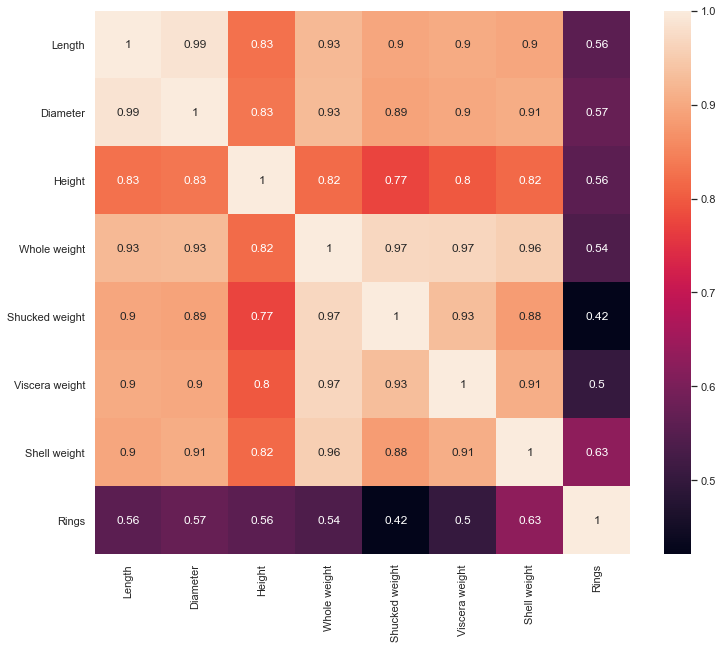

In [3609]:
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

In [3610]:
# use info command to check the null values and Dtype of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3611]:
# use shape command to check the shape of the dataset
df.shape

(4177, 9)

In [3612]:
# use duplicate command to check the duplicate values in our dataset
df.duplicated().sum()

0

In [3613]:
# to check the null value in each and every column.
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Coulumn one: 'Sex'

In [3614]:
# Check the separate column by using unique command
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [3615]:
# make the column 'Sex' from object to int by using LabelEncoder
Lab_enc = LabelEncoder()
df2= Lab_enc.fit_transform(df['Sex'])
pd.Series(df2)

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Length: 4177, dtype: int32

In [3616]:
#Putting changed value of df2 into main dataset.
df['Sex']=df2
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3617]:
#checking the new value in column
df['Sex'].unique()

array([2, 0, 1])

Text(0, 0.5, 'Density')

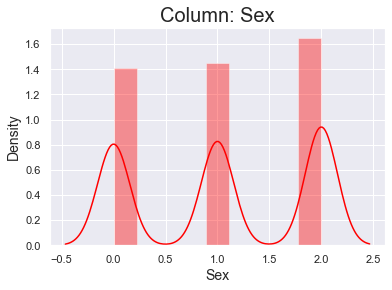

In [3618]:
# Distplot of Column 'Sex'
sns.distplot(df['Sex'], color='red', rug = False, hist = True, kde = True)
plt.title('Column: Sex', fontsize=20)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [3619]:
# check this column is balanced or not?
df.Sex.value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

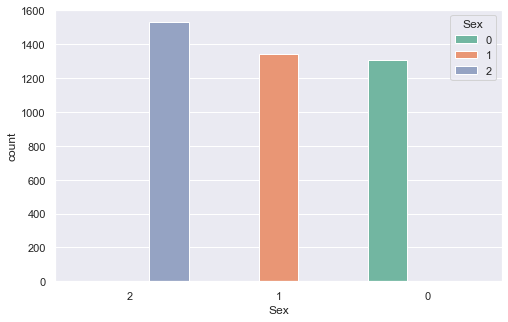

In [3620]:
#plotting each class frequency
fig = plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sex",palette="Set2", data=df, hue = 'Sex', order = df["Sex"].value_counts().index)
plt.show()

# Second Column - 'Length'

In [3621]:
# Check the separate column by using unique command
df['Length'].unique()

array([0.455, 0.35 , 0.53 , 0.44 , 0.33 , 0.425, 0.545, 0.475, 0.55 ,
       0.525, 0.43 , 0.49 , 0.535, 0.47 , 0.5  , 0.355, 0.365, 0.45 ,
       0.38 , 0.565, 0.615, 0.56 , 0.58 , 0.59 , 0.605, 0.575, 0.68 ,
       0.665, 0.705, 0.465, 0.54 , 0.24 , 0.205, 0.21 , 0.39 , 0.46 ,
       0.325, 0.52 , 0.4  , 0.485, 0.405, 0.445, 0.245, 0.505, 0.595,
       0.31 , 0.555, 0.57 , 0.6  , 0.62 , 0.625, 0.695, 0.36 , 0.51 ,
       0.435, 0.495, 0.385, 0.515, 0.37 , 0.27 , 0.375, 0.7  , 0.71 ,
       0.265, 0.305, 0.345, 0.65 , 0.28 , 0.175, 0.17 , 0.635, 0.645,
       0.61 , 0.725, 0.235, 0.315, 0.225, 0.64 , 0.63 , 0.585, 0.42 ,
       0.335, 0.415, 0.275, 0.295, 0.075, 0.13 , 0.11 , 0.16 , 0.23 ,
       0.3  , 0.32 , 0.655, 0.66 , 0.2  , 0.165, 0.19 , 0.74 , 0.34 ,
       0.675, 0.745, 0.685, 0.69 , 0.67 , 0.29 , 0.26 , 0.395, 0.41 ,
       0.22 , 0.255, 0.735, 0.155, 0.48 , 0.195, 0.25 , 0.18 , 0.15 ,
       0.215, 0.73 , 0.715, 0.765, 0.185, 0.285, 0.72 , 0.75 , 0.755,
       0.78 , 0.815,

In [3622]:
# Use describe command for the analysis of Length column
df['Length'].describe()

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

Text(0, 0.5, 'Density')

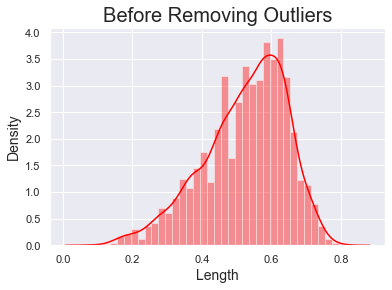

In [3623]:
# using distplot for normalization curve

sns.distplot(df['Length'], color='red', rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=20)
plt.xlabel('Length', fontsize=14)
plt.ylabel('Density', fontsize=14)

Text(0.5, 0, 'Length')

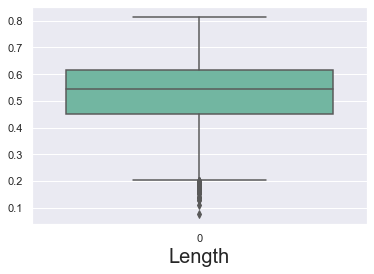

In [3624]:
# using boxplot for outleirs detection
ax = sns.boxplot(data=df["Length"], palette="Set2")

plt.xlabel('Length', fontsize=20)

In [3625]:
# Calculate mean and std 
mu= df.Length.mean()
print(mu)
b= df.Length.std()
print(b)

0.5239920995930099
0.12009291256479998


Text(0.7, 230, '$\\mu=0.5239920995930099, b=0.12009291256479998$')

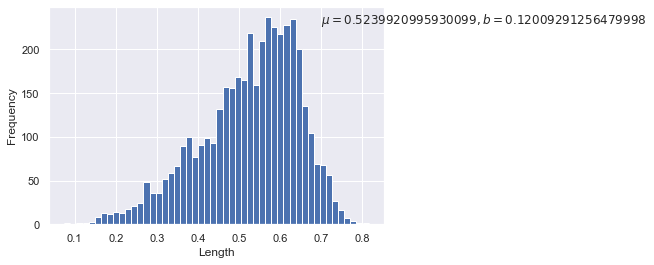

In [3626]:
# visualize by histogram
df.Length.plot(kind ='hist', bins=50)
plt.xlabel('Length')
plt.text(.7, 230, r'$\mu=0.5239920995930099, b=0.12009291256479998$')

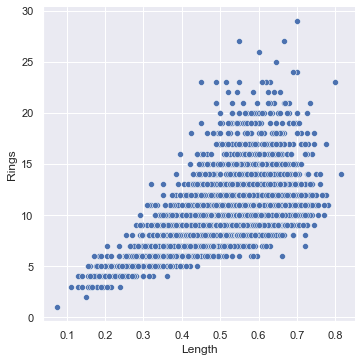

In [3627]:
# Visualize by relational plot of Length and Rings
sns.relplot(data= df, x = 'Length', y='Rings')

In [3628]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Length'], 27,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Length'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [3629]:
# higher side 
higher_side = df['Length'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['Length'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
Name: Length, Length: 4177, dtype: bool
(array([], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
Name: Length, Length: 4177, dtype: bool
(array([  43,   44,  148,  149,  178,  236,  237,  238,  239,  305,  306,
        321,  463,  465,  520,  523,  525,  526,  547,  611,  694,  696,
        718,  719,  720,  784,  892, 1053, 1054, 1055, 1056, 1057, 1210,
       1429, 1531, 1824, 1986, 1987, 1988, 2114, 2115, 2169, 2171, 2172,
       2193, 2343, 2371, 2380, 2381, 2458, 2545, 2546, 2626, 2711, 2712,
       3083, 3141, 3142, 3143, 3190, 3318, 3380, 3472, 3473, 3521, 3600,
       3801, 3837, 3899, 3902, 3994], dtype=int64),)
old Shape:  (4177, 9)


In [3630]:
#removing the outliers
df = df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (4106, 9)


Text(0.5, 0, 'Length')

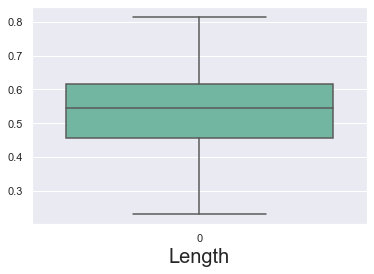

In [3631]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["Length"], palette="Set2", dodge=False)

plt.xlabel('Length', fontsize=20)

Text(0, 0.5, 'Density')

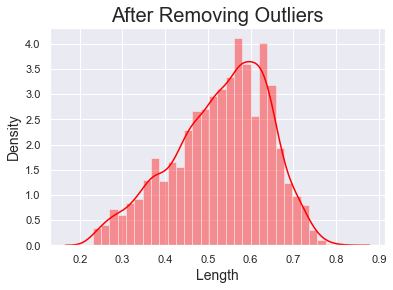

In [3632]:
# Visualize the boxplot after removing outliers
sns.distplot(df['Length'], color='red', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('Length', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [3633]:
# New mean and std
mu_new= df.Length.mean()
print(mu_new)
b_new= df.Length.std()
print(b_new)

0.5298794447150514
0.11232691687480927


Text(0.6, 230, '$\\mu=0.5298794447150514, b=0.11232691687480927$')

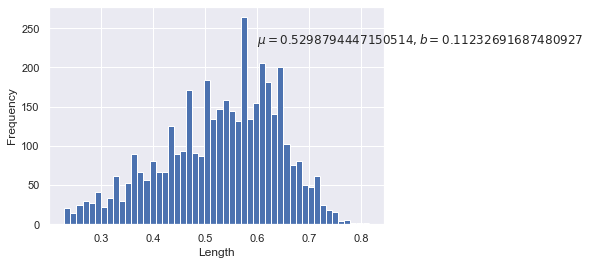

In [3634]:
# Visualize by histogram after removing outliers
df.Length.plot(kind ='hist', bins=50)
plt.xlabel('Length')
plt.text(.6, 230, r'$\mu=0.5298794447150514, b=0.11232691687480927$')

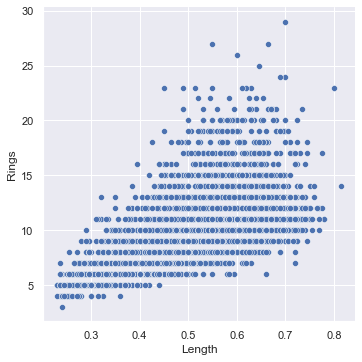

In [3635]:
# Visualize by relational plot after removing outliers
sns.relplot(data= df, x = 'Length', y='Rings')

In [3636]:
# reset index 
df=df.reset_index()
df

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4101,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4102,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4103,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4104,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3637]:
# drop unnecessary column ['index']
df.drop(columns = ['index'], inplace = True)


In [3638]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4101,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4102,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4103,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4104,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Third Column: 'Diameter'

In [3639]:
# Check the separate column by using unique command
df['Diameter'].unique()

array([0.365, 0.265, 0.42 , 0.255, 0.3  , 0.415, 0.425, 0.37 , 0.44 ,
       0.38 , 0.35 , 0.405, 0.355, 0.4  , 0.28 , 0.34 , 0.295, 0.32 ,
       0.275, 0.48 , 0.45 , 0.445, 0.475, 0.47 , 0.56 , 0.525, 0.55 ,
       0.29 , 0.335, 0.175, 0.375, 0.245, 0.41 , 0.36 , 0.31 , 0.385,
       0.19 , 0.345, 0.325, 0.495, 0.39 , 0.235, 0.51 , 0.465, 0.535,
       0.435, 0.43 , 0.395, 0.305, 0.195, 0.54 , 0.26 , 0.2  , 0.33 ,
       0.23 , 0.285, 0.52 , 0.455, 0.205, 0.5  , 0.515, 0.485, 0.46 ,
       0.545, 0.57 , 0.575, 0.16 , 0.21 , 0.49 , 0.25 , 0.27 , 0.505,
       0.215, 0.225, 0.53 , 0.22 , 0.6  , 0.58 , 0.585, 0.565, 0.555,
       0.185, 0.59 , 0.315, 0.24 , 0.17 , 0.18 , 0.595, 0.12 , 0.625,
       0.63 , 0.61 , 0.65 , 0.165, 0.62 , 0.605, 0.615, 0.13 ])

In [3640]:
# Check number of counts
df['Diameter'].value_counts()

0.450    139
0.475    120
0.400    111
0.500    110
0.470    100
        ... 
0.650      1
0.625      1
0.120      1
0.610      1
0.130      1
Name: Diameter, Length: 98, dtype: int64

Text(0.5, 0, 'Diameter')

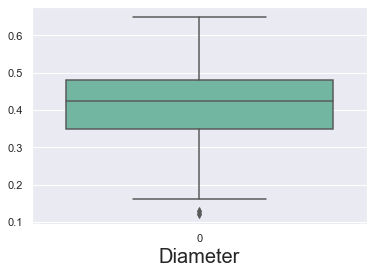

In [3641]:
#visualize the outliers by boxplot
sns.boxplot(data=df['Diameter'], palette="Set2", dodge=False)
plt.xlabel('Diameter', fontsize=20)

Text(0, 0.5, 'Density')

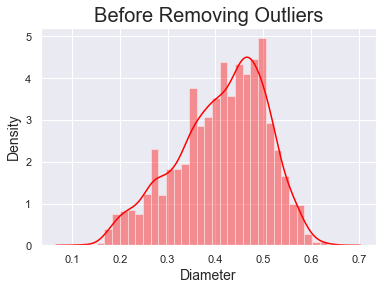

In [3642]:
# Visualize the boxplot before removing outliers
sns.distplot(df['Diameter'], color='red', rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=20)
plt.xlabel('Diameter', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [3643]:
# calculating mean and std
mu= df.Diameter.mean()
print(mu)
b= df.Diameter.std()
print(b)

0.41255845104724925
0.09332313705770912


Text(0.5, 230, '$\\mu=0.41255845104724925, b=0.09332313705770912$')

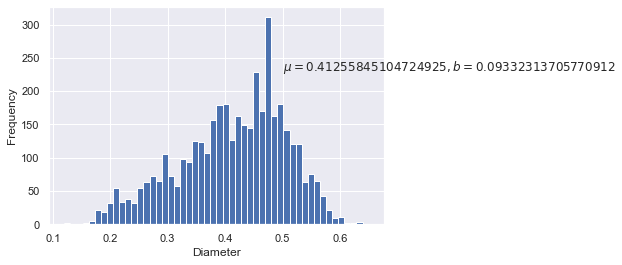

In [3644]:
# Visualize by using histogram
df.Diameter.plot(kind ='hist', bins=50)
plt.xlabel('Diameter')
plt.text(.5, 230, r'$\mu=0.41255845104724925, b=0.09332313705770912$')

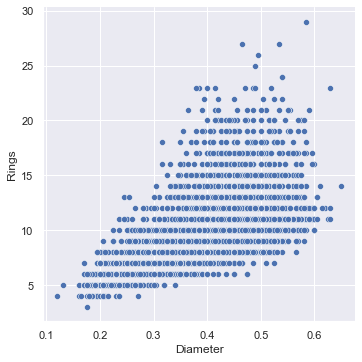

In [3645]:
# Visualize by using relational plot
sns.relplot(data= df, x = 'Diameter', y='Rings')


In [3646]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Diameter'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Diameter'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [3647]:
# higher side 
higher_side = df['Diameter'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['Diameter'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Diameter, Length: 4106, dtype: bool
(array([], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Diameter, Length: 4106, dtype: bool
(array([ 871, 3650], dtype=int64),)
old Shape:  (4106, 9)


In [3648]:
#removing the outliers
df = df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (4104, 9)


Text(0.5, 0, 'Diameter')

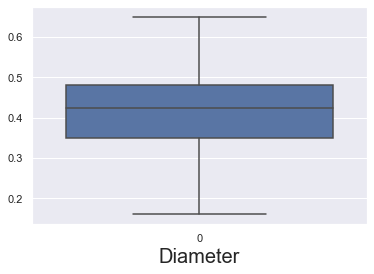

In [3649]:
# Visualize after removing outliers using boxplot
sns.boxplot(data=df['Diameter'])
plt.xlabel('Diameter', fontsize=20)

Text(0, 0.5, 'Density')

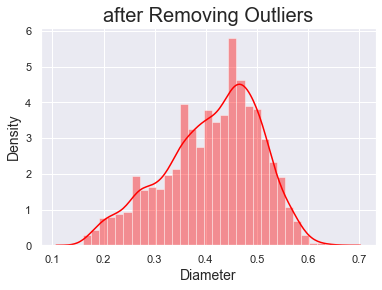

In [3650]:
# Visualize the boxplot after removing outliers
sns.distplot(df['Diameter'], color='red', rug = False, hist = True, kde = True)
plt.title('after Removing Outliers', fontsize=20)
plt.xlabel('Diameter', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [3651]:
# Calculating mean and std after removing outliers
mu_new= df.Diameter.mean()
print(mu_new)
b_new= df.Diameter.std()
print(b_new)

0.41269858674464066
0.09312955676691959


Text(0.5, 190, '$\\mu=0.41269858674464066, b=0.09312955676691959$')

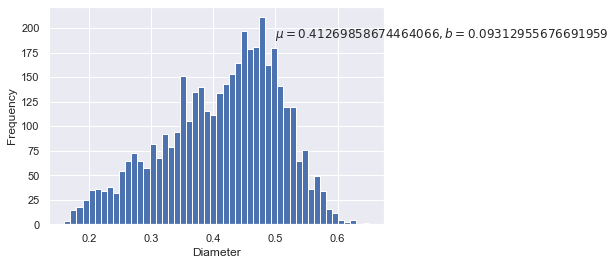

In [3652]:
#visualize bys using histogram
df.Diameter.plot(kind ='hist', bins=50)
plt.xlabel('Diameter')
plt.text(.5, 190, r'$\mu=0.41269858674464066, b=0.09312955676691959$')

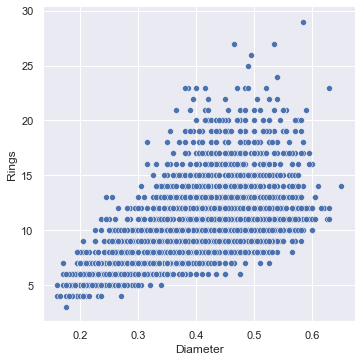

In [3653]:
#visualize bys using relational plot
sns.relplot(data= df, x = 'Diameter', y='Rings')

# Fourth Column : 'Height'

In [3654]:
# Check the separate column by using unique command
df['Height'].unique()

array([0.095, 0.09 , 0.135, 0.125, 0.08 , 0.15 , 0.14 , 0.11 , 0.145,
       0.1  , 0.13 , 0.085, 0.155, 0.165, 0.185, 0.18 , 0.175, 0.2  ,
       0.105, 0.045, 0.12 , 0.07 , 0.16 , 0.06 , 0.17 , 0.195, 0.19 ,
       0.115, 0.075, 0.065, 0.215, 0.21 , 0.23 , 0.205, 0.22 , 0.04 ,
       0.225, 0.24 , 0.235, 0.055, 0.05 , 0.015, 0.   , 0.515, 0.25 ,
       1.13 ])

In [3655]:
# check if any value is zero or not
df['Height'].all()

False

In [3656]:
#calculating mean first
df['Height'].mean()

0.14118786549707513

In [3657]:
#replacing all zero value to the mean of the column
df['Height']=df['Height'].replace(0,df['Height'].mean())

In [3658]:
#check the values after replacing by mean
df['Height'].unique()

array([0.095     , 0.09      , 0.135     , 0.125     , 0.08      ,
       0.15      , 0.14      , 0.11      , 0.145     , 0.1       ,
       0.13      , 0.085     , 0.155     , 0.165     , 0.185     ,
       0.18      , 0.175     , 0.2       , 0.105     , 0.045     ,
       0.12      , 0.07      , 0.16      , 0.06      , 0.17      ,
       0.195     , 0.19      , 0.115     , 0.075     , 0.065     ,
       0.215     , 0.21      , 0.23      , 0.205     , 0.22      ,
       0.04      , 0.225     , 0.24      , 0.235     , 0.055     ,
       0.05      , 0.015     , 0.14118787, 0.515     , 0.25      ,
       1.13      ])

In [3659]:
# check the number of counts
df['Height'].value_counts()

0.150000    267
0.140000    220
0.155000    217
0.175000    211
0.160000    205
0.125000    202
0.165000    193
0.135000    189
0.145000    182
0.130000    169
0.120000    168
0.170000    160
0.100000    145
0.110000    135
0.115000    133
0.180000    131
0.090000    124
0.105000    114
0.185000    103
0.190000    103
0.095000     90
0.195000     78
0.080000     75
0.085000     74
0.200000     68
0.075000     59
0.070000     46
0.205000     45
0.065000     38
0.215000     31
0.060000     24
0.210000     23
0.220000     17
0.055000     14
0.225000     13
0.230000     10
0.050000      7
0.235000      6
0.240000      4
0.250000      3
0.040000      2
0.141188      2
0.015000      1
0.515000      1
1.130000      1
0.045000      1
Name: Height, dtype: int64

Text(0.5, 0, 'Height')

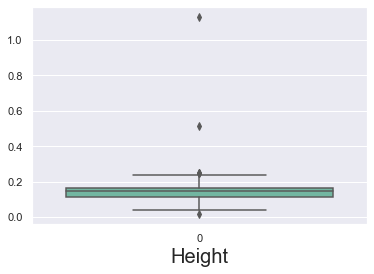

In [3660]:
#visualize the outlioers by using boxplot
ax = sns.boxplot(data=df["Height"], palette="Set2", dodge=False)

plt.xlabel('Height', fontsize=20)

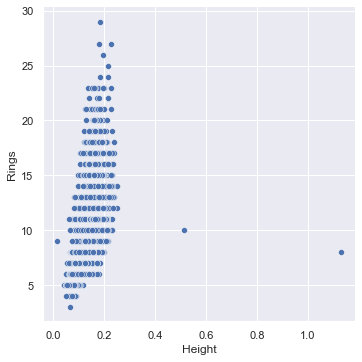

In [3661]:
#visualize the outlioers by using relational plot
sns.relplot(data= df, x = 'Height', y='Rings')

Text(0, 0.5, 'Rings')

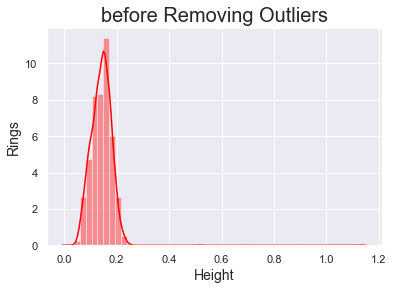

In [3662]:
# Visualize the boxplot before removing outliers
sns.distplot(df['Height'], color='red', rug = False, hist = True, kde = True)
plt.title('before Removing Outliers', fontsize=20)
plt.xlabel('Height', fontsize=14)
plt.ylabel('Rings', fontsize=14)

In [3663]:
#calculating the mean and std
mu= df.Height.mean()
print(mu)
b= df.Height.std()
print(b)

0.141256670499754
0.0400718240737734


Text(0.25, 800, '$\\mu=0.141256670499754, b=0.0400718240737734$')

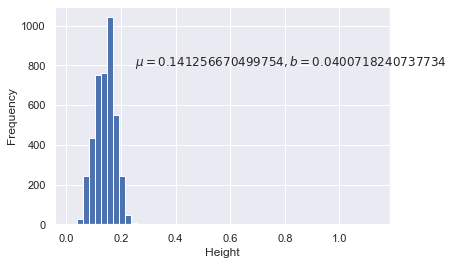

In [3664]:
# Visualize the histogram before removing outliers
df.Height.plot(kind ='hist', bins=50)
plt.xlabel('Height')
plt.text(.250, 800, r'$\mu=0.141256670499754, b=0.0400718240737734$')

In [3665]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Height'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Height'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [3666]:
# higher side 
higher_side = df['Height'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['Height'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Height, Length: 4104, dtype: bool
(array([1383, 1394, 1727, 2011, 2134], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Height, Length: 4104, dtype: bool
(array([1141], dtype=int64),)
old Shape:  (4104, 9)


In [3667]:
#removing the outliers
df = df.drop(df.index[high])
df = df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (4098, 9)


Text(0.5, 0, 'Height')

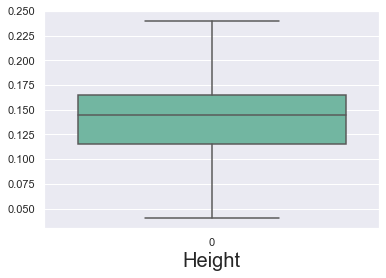

In [3668]:
#visualize the outlioers by using boxplot
ax = sns.boxplot(data=df["Height"], palette="Set2", dodge=False)

plt.xlabel('Height', fontsize=20)

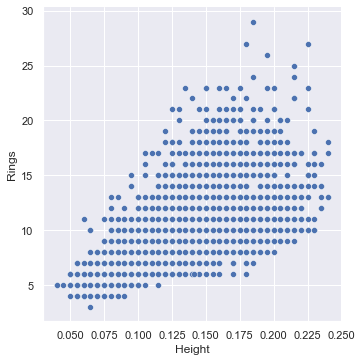

In [3669]:
#visualize the outlioers by using relational plot
sns.relplot(data= df, x = 'Height', y='Rings')

Text(0, 0.5, 'Rings')

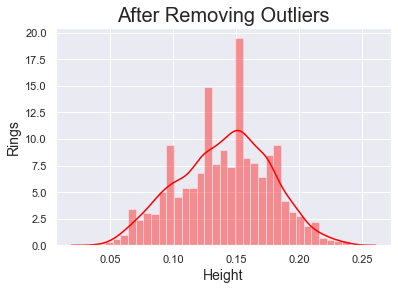

In [3670]:
# Visualize the boxplot after removing outliers
sns.distplot(df['Height'], color='red', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('Height', fontsize=14)
plt.ylabel('Rings', fontsize=14)

In [3671]:
# calculating new mean and new std
mu_new= df.Height.mean()
print(mu_new)
b_new= df.Height.std()
print(b_new)

0.14087539671327243
0.0363688942894757


Text(0.19, 190, '$\\mu=0.14087539671327243, b=0.0363688942894757$')

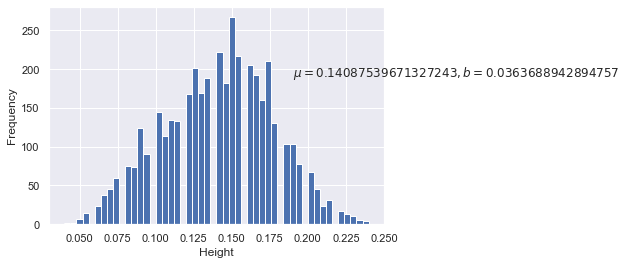

In [3672]:
#visualize the outliers by using histogram
df.Height.plot(kind ='hist', bins=50)
plt.xlabel('Height')
plt.text(.190, 190, r'$\mu=0.14087539671327243, b=0.0363688942894757$')

# Fifth Column: 'Whole weight'

In [3189]:
# Check the separate column by using unique command
df['Whole weight'].unique()

array([0.514 , 0.2255, 0.677 , ..., 1.176 , 1.0945, 1.9485])

In [3673]:
# check the number of counts
df['Whole weight'].value_counts()

0.2225    8
0.9700    7
0.1960    7
0.4775    7
1.1345    7
         ..
0.3945    1
1.2985    1
1.8075    1
0.5540    1
0.0580    1
Name: Whole weight, Length: 2373, dtype: int64

In [3674]:
#check the null values
df['Whole weight'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Whole weight, Length: 4098, dtype: bool

In [3675]:
#check if there are any zero values are in this column or not
df['Whole weight'].all()

True

Text(0.5, 0, 'Whole weight')

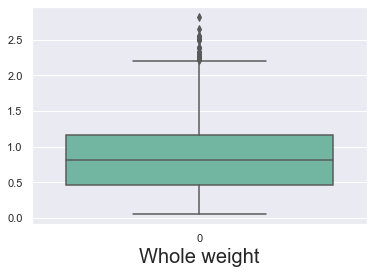

In [3676]:
#visualize the outliers by using boxplot
ax = sns.boxplot(data=df["Whole weight"], palette="Set2", dodge=False)

plt.xlabel('Whole weight', fontsize=20)

Text(0, 0.5, 'Rings')

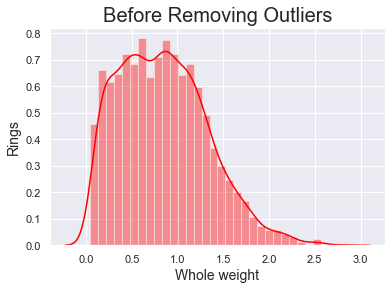

In [3677]:
# Visualize the boxplot before removing outliers
sns.distplot(df['Whole weight'], color='red', rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=20)
plt.xlabel('Whole weight', fontsize=14)
plt.ylabel('Rings', fontsize=14)

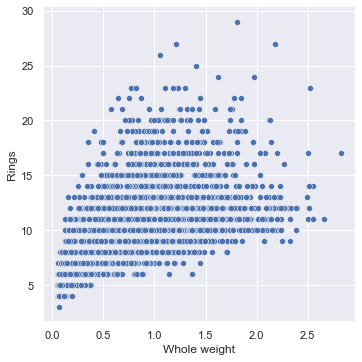

In [3678]:
#visualize the outliers by using relational plot
sns.relplot(data= df, x = 'Whole weight', y='Rings')

In [3679]:
#calculating mean and std
mu = df['Whole weight'].mean()
print(mu)
b = df['Whole weight'].std()
print(b)

0.841475597852613
0.48153149386619476


Text(1.65, 140, '$\\mu=0.841475597852613, b=0.48153149386619476$')

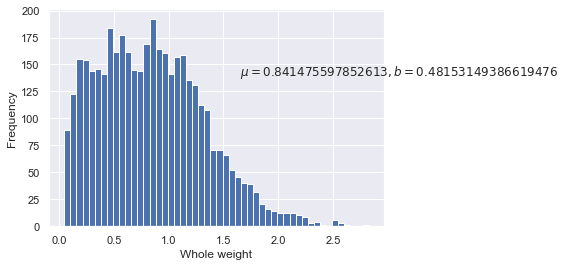

In [3680]:
#visualize the outliers by using histogram
df['Whole weight'].plot(kind ='hist', bins=50)
plt.xlabel('Whole weight')
plt.text(1.65, 140, r'$\mu=0.841475597852613, b=0.48153149386619476$')

In [3681]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Whole weight'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Whole weight'], 74,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [3683]:
# higher side 
higher_side = df['Whole weight'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['Whole weight'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Whole weight, Length: 4098, dtype: bool
(array([ 161,  346,  865, 1020, 1023, 1024, 1159, 1172, 1173, 1175, 1386,
       1390, 1391, 1490, 1722, 1723, 1944, 2063, 2114, 2213, 2282, 2564,
       2565, 2566, 2650, 2749, 2800, 2801, 2945, 2946, 3122, 3358, 3527,
       3642, 3726, 3883, 3915], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Whole weight, Length: 4098, dtype: bool
(array([], dtype=int64),)
old Shape:  (4098, 9)


In [3684]:
#removing the outliers
df = df.drop(df.index[high])
df = df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (4061, 9)


Text(0.5, 0, 'Whole weight')

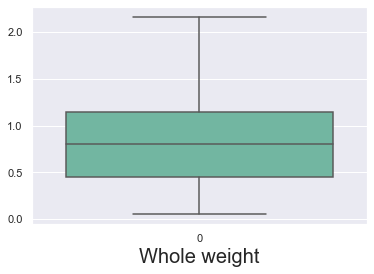

In [3685]:
#visualize the outliers by using boxplot
ax = sns.boxplot(data=df["Whole weight"], palette="Set2", dodge=False)

plt.xlabel('Whole weight', fontsize=20)

Text(0, 0.5, 'Rings')

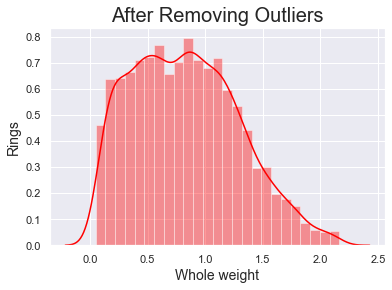

In [3687]:
# Visualize the boxplot after removing outliers
sns.distplot(df['Whole weight'], color='red', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('Whole weight', fontsize=14)
plt.ylabel('Rings', fontsize=14)

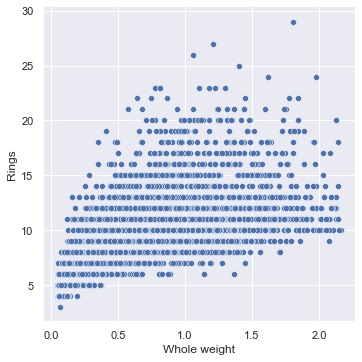

In [3688]:
#visualize the outliers by using relational plot
sns.relplot(data= df, x = 'Whole weight', y='Rings')

In [3204]:
#calculating mean and std
mu_new = df['Whole weight'].mean()
print(mu_new)
b_new = df['Whole weight'].std()
print(b_new)

0.8277733316917039
0.46146778172682595


Text(1.5, 120, '$\\mu=0.8277733316917039, b=0.46146778172682595$')

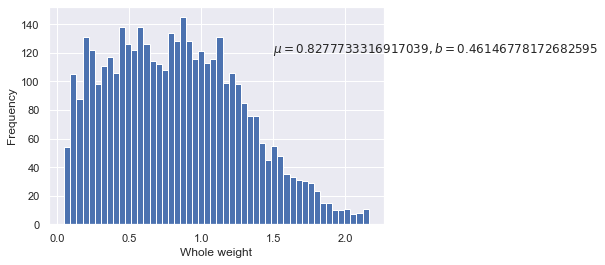

In [3689]:
##visualize the outliers by using histogram
df['Whole weight'].plot(kind ='hist', bins=50)
plt.xlabel('Whole weight')
plt.text(1.5, 120, r'$\mu=0.8277733316917039, b=0.46146778172682595$')

# Sixth Column: 'Shucked weight'

In [3206]:
# Check the separate column by using unique command
df['Shucked weight'].unique()

array([0.2245, 0.0995, 0.2565, ..., 0.727 , 0.137 , 0.9455])

In [3207]:
#check the zeros in the column
df['Shucked weight'].all()

True

In [3208]:
#check the null values in the column
df['Shucked weight'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Shucked weight, Length: 4061, dtype: bool

In [3209]:
#count the number of values
df['Shucked weight'].value_counts()

0.1750    11
0.2505    10
0.2025     9
0.2945     9
0.0970     9
          ..
0.1780     1
0.6220     1
0.7775     1
0.6955     1
0.4065     1
Name: Shucked weight, Length: 1449, dtype: int64

Text(0.5, 0, 'Shucked weight')

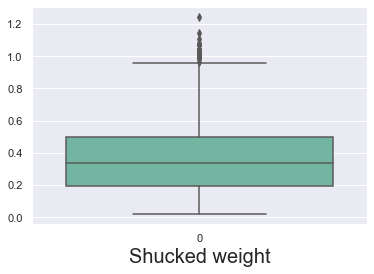

In [3690]:
#visualize the outliers by using boxplot
ax = sns.boxplot(data=df["Shucked weight"], palette="Set2", dodge=False)

plt.xlabel('Shucked weight', fontsize=20)

Text(0, 0.5, 'Rings')

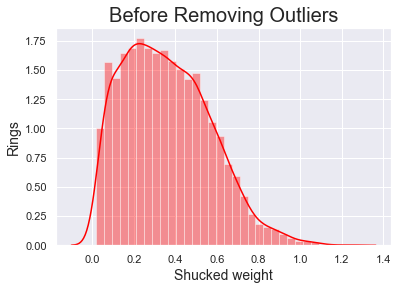

In [3691]:
# Visualize the boxplot before removing outliers
sns.distplot(df['Shucked weight'], color='red', rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=20)
plt.xlabel('Shucked weight', fontsize=14)
plt.ylabel('Rings', fontsize=14)

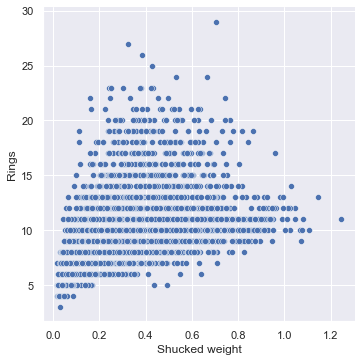

In [3692]:
#visualize the outliers by using relational plot
sns.relplot(data= df, x = 'Shucked weight', y='Rings')

In [3693]:
#calculating mean and std
mu= df['Shucked weight'].mean()
print(mu)
b= df['Shucked weight'].std()
print(b)

0.358474883033735
0.20807725861143161


Text(0.6, 120, '$\\mu=0.358474883033735, b=0.20807725861143161$')

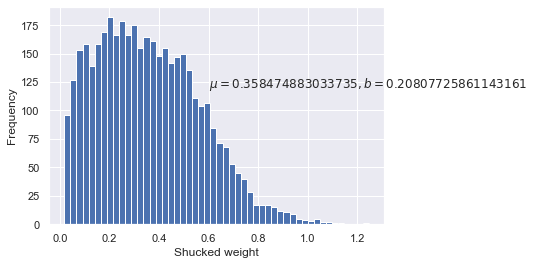

In [3695]:
#visualize the outliers by using histogram
df['Shucked weight'].plot(kind ='hist', bins=50)
plt.xlabel('Shucked weight')
plt.text(0.6, 120, r'$\mu=0.358474883033735, b=0.20807725861143161$')

In [3696]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Shucked weight'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Shucked weight'], 74,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [3698]:
# higher side 
higher_side = df['Shucked weight'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['Shucked weight'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Shucked weight, Length: 4061, dtype: bool
(array([ 854, 1156, 1158, 1161, 1163, 1372, 1373, 1378, 1476, 1696, 1697,
       1701, 1703, 1706, 1765, 1925, 2466, 2591, 2723, 2880, 2882, 2884,
       2990, 3521, 3607, 3848], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Shucked weight, Length: 4061, dtype: bool
(array([], dtype=int64),)
old Shape:  (4061, 9)


In [3699]:
#removing the outliers
df = df.drop(df.index[high])
df = df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (4035, 9)


Text(0.5, 0, 'Shucked weight')

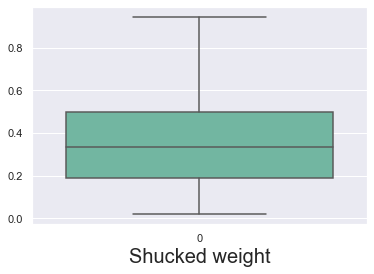

In [3700]:
#visualize the outliers by using boxplot
ax = sns.boxplot(data=df["Shucked weight"], palette="Set2", dodge=False)

plt.xlabel('Shucked weight', fontsize=20)

Text(0, 0.5, 'Rings')

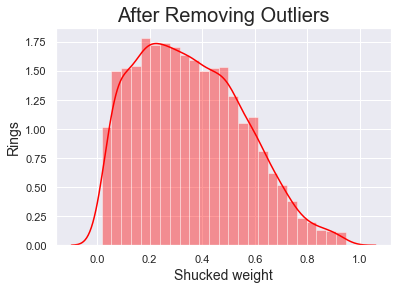

In [3701]:
# Visualize the boxplot after removing outliers
sns.distplot(df['Shucked weight'], color='red', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('Shucked weight', fontsize=14)
plt.ylabel('Rings', fontsize=14)

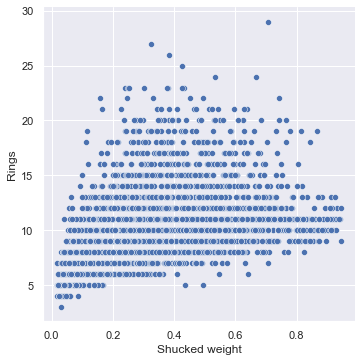

In [3702]:
#visualize the outliers by using relational plot
sns.relplot(data= df, x = 'Shucked weight', y='Rings')

In [3703]:
#calculating new mean and new std
mu_new = df['Shucked weight'].mean()
print(mu_new)
b_new = df['Shucked weight'].std()
print(b_new)

0.3541795539033453
0.20165081755825626


Text(0.6, 120, '$\\mu=0.3541795539033453, b=0.20165081755825626$')

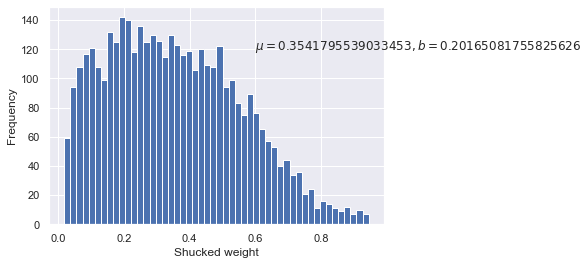

In [3704]:
#visaulize the outliers by using histogram
df['Shucked weight'].plot(kind ='hist', bins=50)
plt.xlabel('Shucked weight')
plt.text(0.6, 120, r'$\mu=0.3541795539033453, b=0.20165081755825626$')

# Seventh column: 'Viscera weight'

In [3223]:
# Check the separate column by using unique command
df['Viscera weight'].unique()

array([1.010e-01, 4.850e-02, 1.415e-01, 1.140e-01, 3.950e-02, 7.750e-02,
       1.495e-01, 1.125e-01, 1.510e-01, 1.475e-01, 8.100e-02, 9.500e-02,
       1.710e-01, 8.050e-02, 1.330e-01, 8.700e-02, 4.300e-02, 7.500e-02,
       6.200e-02, 4.900e-02, 2.140e-01, 2.100e-01, 3.010e-01, 1.880e-01,
       2.720e-01, 2.340e-01, 2.190e-01, 2.270e-01, 2.420e-01, 2.805e-01,
       3.575e-01, 3.925e-01, 4.115e-01, 1.240e-01, 3.075e-01, 1.165e-01,
       2.035e-01, 8.600e-02, 9.100e-02, 1.960e-01, 2.350e-02, 4.500e-02,
       1.100e-01, 2.550e-02, 2.135e-01, 1.110e-01, 6.000e-02, 9.600e-02,
       1.055e-01, 9.150e-02, 1.755e-01, 9.550e-02, 1.200e-01, 1.400e-02,
       1.300e-01, 1.600e-01, 1.935e-01, 8.000e-02, 1.315e-01, 1.015e-01,
       2.240e-01, 1.155e-01, 4.050e-02, 1.680e-01, 9.850e-02, 2.250e-01,
       2.610e-01, 2.895e-01, 2.210e-01, 1.890e-01, 1.940e-01, 1.595e-01,
       2.355e-01, 2.520e-01, 1.920e-01, 2.160e-01, 2.225e-01, 2.050e-01,
       2.075e-01, 2.310e-01, 1.675e-01, 1.525e-01, 

In [3224]:
#count the zeros present in column or not
df['Viscera weight'].all()

True

In [3225]:
#check the null values present in column or not
df['Viscera weight'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Viscera weight, Length: 4035, dtype: bool

In [3226]:
#count the number of values assign
df['Viscera weight'].value_counts()

0.1715    15
0.1960    14
0.2195    13
0.0575    13
0.0610    13
          ..
0.4345     1
0.3505     1
0.4530     1
0.4385     1
0.4065     1
Name: Viscera weight, Length: 824, dtype: int64

Text(0.5, 0, 'Viscera weight')

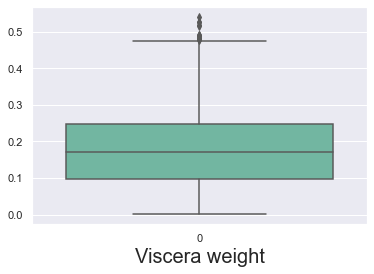

In [3227]:
#visaulize the outliers by using boxplot
ax = sns.boxplot(data=df["Viscera weight"], palette="Set2", dodge=False)

plt.xlabel('Viscera weight', fontsize=20)

Text(0, 0.5, 'Rings')

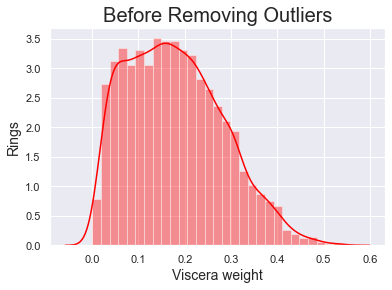

In [3705]:
# Visualize the boxplot before removing outliers
sns.distplot(df['Viscera weight'], color='red', rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=20)
plt.xlabel('Viscera weight', fontsize=14)
plt.ylabel('Rings', fontsize=14)

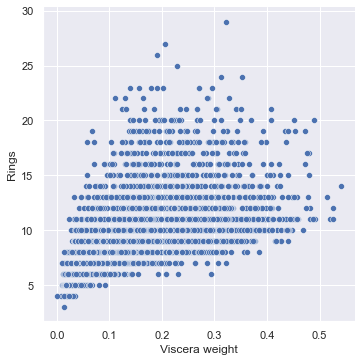

In [3229]:
#visaulize the outliers by using relationalplot
sns.relplot(data= df, x = 'Viscera weight', y='Rings')

In [3706]:
#calculating mean and std
mu= df['Viscera weight'].mean()
print(mu)
b= df['Viscera weight'].std()
print(b)

0.1789728624535321
0.10233341455200147


Text(0.3, 120, '$\\mu=0.1789728624535321, b=0.10233341455200147$')

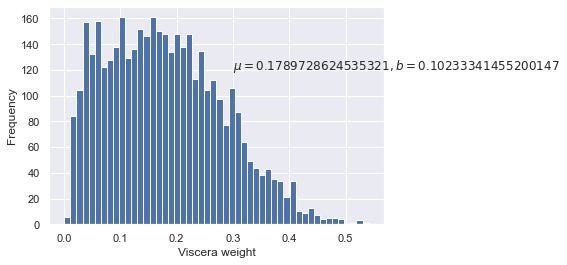

In [3707]:
#visaulize the outliers by using histogram
df['Viscera weight'].plot(kind ='hist', bins=50)
plt.xlabel('Viscera weight')
plt.text(0.3, 120, r'$\mu=0.1789728624535321, b=0.10233341455200147$')

In [3708]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Viscera weight'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Viscera weight'], 74,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [3709]:
# higher side 
higher_side = df['Viscera weight'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['Viscera weight'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Viscera weight, Length: 4035, dtype: bool
(array([ 165,  342,  436,  719, 1361, 1685, 1691, 1693, 2010, 2012, 2079,
       2080, 2607, 2862, 3180, 3498, 3664, 4006], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Viscera weight, Length: 4035, dtype: bool
(array([], dtype=int64),)
old Shape:  (4035, 9)


In [3710]:
#removing the outliers
df = df.drop(df.index[high])
df = df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (4017, 9)


Text(0.5, 0, 'Viscera weight')

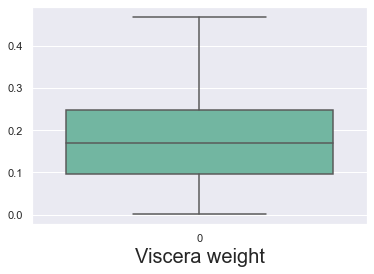

In [3711]:
#visaulize the outliers by using boxplot
ax = sns.boxplot(data=df["Viscera weight"], palette="Set2", dodge=False)

plt.xlabel('Viscera weight', fontsize=20)

Text(0, 0.5, 'Rings')

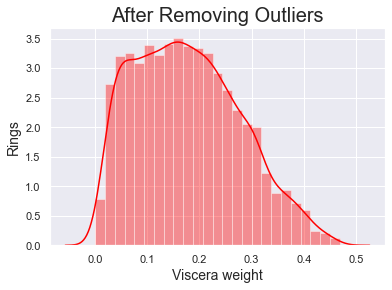

In [3712]:
# Visualize the boxplot after removing outliers
sns.distplot(df['Viscera weight'], color='red', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('Viscera weight', fontsize=14)
plt.ylabel('Rings', fontsize=14)

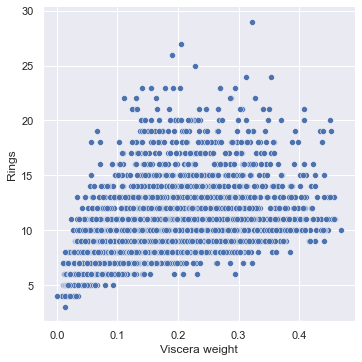

In [3713]:
#visaulize the outliers by using realtional plot
sns.relplot(data= df, x = 'Viscera weight', y='Rings')

In [3714]:
#calulating new mean and new std
mu_new = df['Viscera weight'].mean()
print(mu_new)
b_new = df['Viscera weight'].std()
print(b_new)

0.1775638536221066
0.10035890259744888


Text(0.3, 120, '$\\mu=0.1775638536221066, b=0.10035890259744888$')

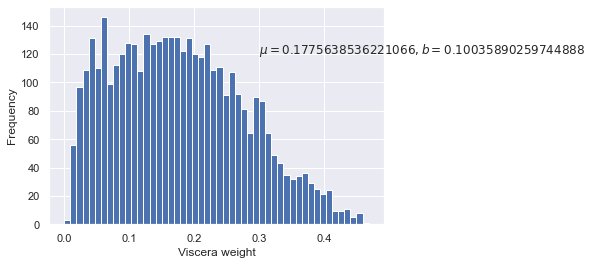

In [3715]:
#visaulize the outliers by using histogram
df['Viscera weight'].plot(kind ='hist', bins=50)
plt.xlabel('Viscera weight')
plt.text(0.3, 120, r'$\mu=0.1775638536221066, b=0.10035890259744888$')

# Eight Column: 'Shell weight'

In [3242]:
# Check the separate column by using unique command
df['Shell weight'].unique()

array([0.15  , 0.07  , 0.21  , 0.155 , 0.055 , 0.12  , 0.33  , 0.26  ,
       0.165 , 0.32  , 0.135 , 0.19  , 0.205 , 0.185 , 0.24  , 0.115 ,
       0.13  , 0.1   , 0.075 , 0.085 , 0.27  , 0.2   , 0.305 , 0.3   ,
       0.285 , 0.28  , 0.295 , 0.46  , 0.35  , 0.455 , 0.49  , 0.125 ,
       0.34  , 0.145 , 0.09  , 0.02  , 0.14  , 0.045 , 0.245 , 0.16  ,
       0.11  , 0.22  , 0.17  , 0.025 , 0.175 , 0.485 , 0.275 , 0.425 ,
       0.38  , 0.315 , 0.345 , 0.675 , 0.58  , 0.36  , 0.44  , 0.4   ,
       0.255 , 0.39  , 0.48  , 0.25  , 0.335 , 0.235 , 0.105 , 0.18  ,
       0.31  , 0.03  , 0.08  , 0.54  , 0.78  , 0.41  , 0.129 , 0.062 ,
       0.068 , 0.028 , 0.1355, 0.048 , 0.063 , 0.117 , 0.0925, 0.2475,
       0.2665, 0.4465, 0.2425, 0.174 , 0.1565, 0.042 , 0.325 , 0.45  ,
       0.355 , 0.635 , 1.005 , 0.815 , 0.85  , 0.65  , 0.76  , 0.62  ,
       0.015 , 0.035 , 0.05  , 0.57  , 0.29  , 0.195 , 0.465 , 0.23  ,
       0.06  , 0.435 , 0.04  , 0.37  , 0.365 , 0.026 , 0.0905, 0.55  ,
      

In [3716]:
##count the zeros present in column or not
df['Shell weight'].all()

True

In [3244]:
#count the number of values
df['Shell weight'].value_counts()

0.2750    43
0.2500    42
0.2650    40
0.1850    40
0.3150    40
          ..
0.3510     1
0.4465     1
0.5130     1
0.5195     1
0.4065     1
Name: Shell weight, Length: 856, dtype: int64

In [3245]:
#count the null values
df['Shell weight'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Shell weight, Length: 4017, dtype: bool

Text(0.5, 0, 'Shell weight')

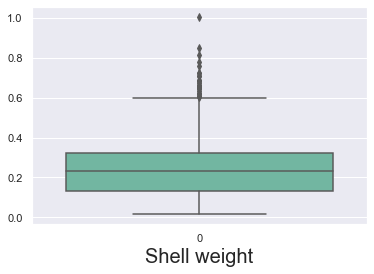

In [3717]:
#visaulize the outliers by using boxplot
ax = sns.boxplot(data=df["Shell weight"], palette="Set2", dodge=False)

plt.xlabel('Shell weight', fontsize=20)

Text(0, 0.5, 'Rings')

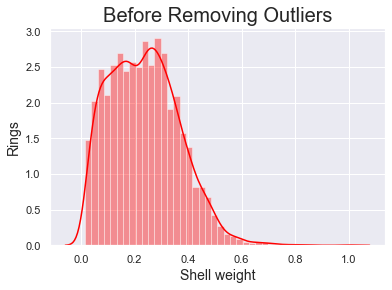

In [3718]:
# Visualize the boxplot before removing outliers
sns.distplot(df['Shell weight'], color='red', rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=20)
plt.xlabel('Shell weight', fontsize=14)
plt.ylabel('Rings', fontsize=14)

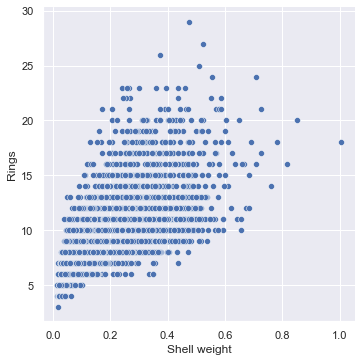

In [3719]:
#visaulize the outliers by using relational plot
sns.relplot(data= df, x = 'Shell weight', y='Rings')

In [3720]:
#calculating mean and std
mu= df['Shell weight'].mean()
print(mu)
b= df['Shell weight'].std()
print(b)

0.23617998506348012
0.12963340258758171


Text(0.4, 120, '$\\mu=0.23617998506348012, b=0.12963340258758171$')

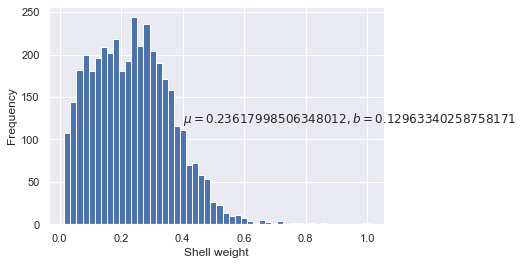

In [3250]:
#visaulize the outliers by using histogram
df['Shell weight'].plot(kind ='hist', bins=50)
plt.xlabel('Shell weight')
plt.text(0.4, 120, r'$\mu=0.23617998506348012, b=0.12963340258758171$')

In [3721]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Shell weight'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Shell weight'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [3722]:
# higher side 
higher_side = df['Shell weight'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side
lower_side = df['Shell weight'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Shell weight, Length: 4017, dtype: bool
(array([  79,   81,  127,  153,  159,  160,  161,  162,  163,  164,  174,
        264,  266,  320,  356,  359,  449,  459, 1156, 1364, 1461, 1682,
       1744, 2019, 2060, 2066, 2100, 2109, 2111, 2114, 2172, 2174, 2243,
       2266, 2436, 2953, 3015, 3016, 3018, 3051, 3144, 3201, 3330, 3773,
       3835, 3986], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Shell weight, Length: 4017, dtype: bool
(array([], dtype=int64),)
old Shape:  (4017, 9)


In [3723]:
#removing the outliers
df = df.drop(df.index[high])
df = df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (3971, 9)


Text(0.5, 0, 'Shell weight')

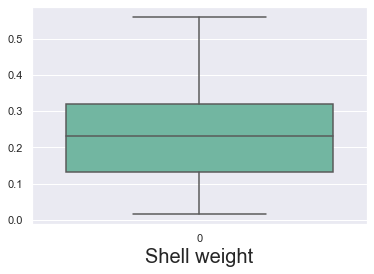

In [3724]:
#visaulize the outliers by using boxplot
ax = sns.boxplot(data=df["Shell weight"], palette="Set2", dodge=False)

plt.xlabel('Shell weight', fontsize=20)

Text(0, 0.5, 'Rings')

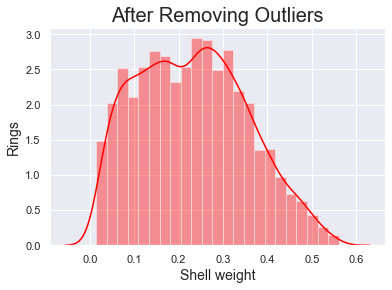

In [3725]:
# Visualize the boxplot after removing outliers
sns.distplot(df['Shell weight'], color='red', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('Shell weight', fontsize=14)
plt.ylabel('Rings', fontsize=14)

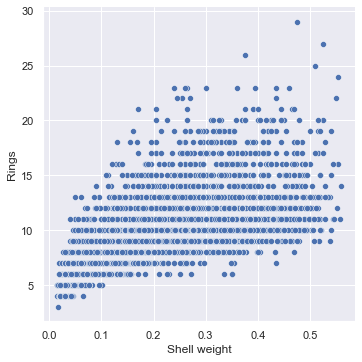

In [3726]:
#visaulize the outliers by using relational plot
sns.relplot(data= df, x = 'Shell weight', y='Rings')

In [3727]:
#calculating mean and std
mu_new = df['Shell weight'].mean()
print(mu_new)
b_new = df['Shell weight'].std()
print(b_new)

0.23144711659531578
0.12228614540826926


Text(0.4, 120, '$\\mu=0.23144711659531578, b=0.12228614540826926$')

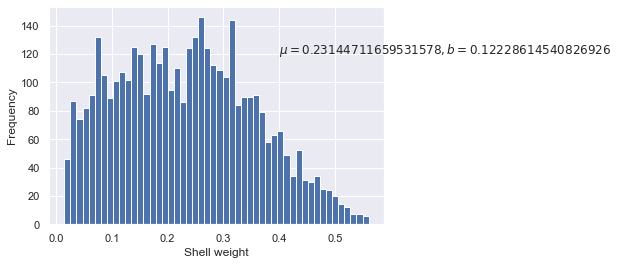

In [3258]:
#visaulize the outliers by using histogram
df['Shell weight'].plot(kind ='hist', bins=50)
plt.xlabel('Shell weight')
plt.text(0.4, 120, r'$\mu=0.23144711659531578, b=0.12228614540826926$')

In [3259]:
#total shape of the dataset now
df.shape

(3971, 9)

# Target Column: 'Rings'

In [3728]:
# Check the separate column by using unique command
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  6,  4, 17,
       22, 26, 21, 23, 29,  3, 25, 27, 24], dtype=int64)

In [3261]:
#check the zero value in the column
df['Rings'].all()

True

In [3262]:
#count the values
df['Rings'].value_counts()

9     685
10    619
8     567
11    462
7     390
6     254
12    242
13    193
14    116
15     99
5      97
16     59
17     48
18     36
19     30
4      24
20     22
21      9
23      8
22      5
3       1
26      1
24      1
25      1
27      1
29      1
Name: Rings, dtype: int64

Text(0.5, 0, 'Rings')

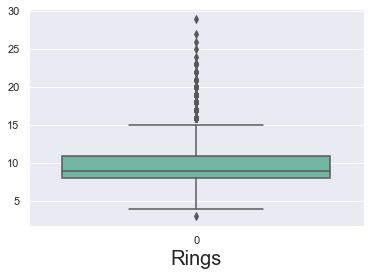

In [3729]:
#visaulize the outliers by using boxplot
ax = sns.boxplot(data=df["Rings"], palette="Set2", dodge=False)

plt.xlabel('Rings', fontsize=20)

Text(0, 0.5, 'Rings')

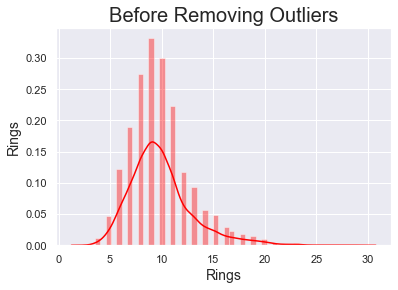

In [3730]:
# Visualize the boxplot before removing outliers
sns.distplot(df['Rings'], color='red', rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=20)
plt.xlabel('Rings', fontsize=14)
plt.ylabel('Rings', fontsize=14)

In [3731]:
#calculating mean and std
mu= df['Rings'].mean()
print(mu)
b= df['Rings'].std()
print(b)

9.913120120876354
3.0623671077609385


Text(15, 350, '$\\mu=9.913120120876354, b=3.0623671077609385$')

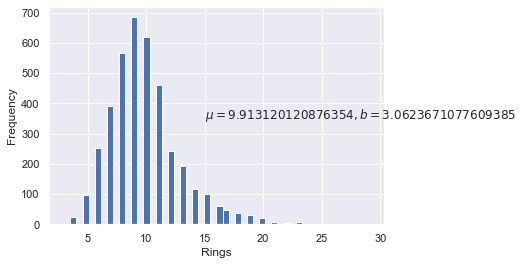

In [3732]:
#visaulize the outliers by using histogram
df['Rings'].plot(kind ='hist', bins=50)
plt.xlabel('Rings')
plt.text(15, 350, r'$\mu=9.913120120876354, b=3.0623671077609385$')

In [3733]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Rings'], 30,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Rings'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [3734]:
# higher side 
higher_side = df['Rings'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['Rings'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Rings, Length: 3971, dtype: bool
(array([   6,    7,    9,   32,   33,   36,   70,   79,  124,  125,  137,
        179,  214,  218,  234,  248,  249,  254,  263,  266,  269,  270,
        284,  286,  287,  288,  292,  309,  323,  326,  328,  329,  330,
        332,  333,  335,  339,  340,  341,  375,  384,  385,  386,  394,
        395,  396,  397,  398,  399,  400,  401,  410,  415,  417,  418,
        419,  433,  439,  441,  442,  443,  444,  446,  457,  460,  464,
        467,  472,  489,  508,  528,  530,  531,  537,  540,  550,  551,
        557,  558,  570,  578,  580,  585,  599,  613,  614,  615,  617,
        621,  628,  629,  630,  631,  632,  635,  640,  644,  654,  677,
        686,  695,  696,  697,  705,  707,  712,  713,  720,  761, 1854,
       1990, 2023, 2039, 2053, 2056, 2057, 2075, 2076, 2077, 2082, 2

In [3735]:
#removing the outliers
df = df.drop(df.index[high])
df = df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (3748, 9)


Text(0.5, 0, 'Rings')

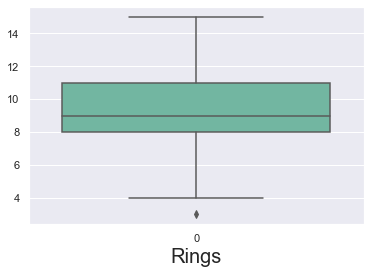

In [3736]:
#visaulize the outliers by using boxplot
ax = sns.boxplot(data=df["Rings"], palette="Set2", dodge=False)

plt.xlabel('Rings', fontsize=20)

In [3737]:
#calculating new mean and new std
mu_new= df['Rings'].mean()
print(mu_new)
b_new= df['Rings'].std()
print(b_new)

9.424759871931697
2.3173486342779985


Text(12, 350, '$\\mu=9.424759871931697, b=2.3173486342779985$')

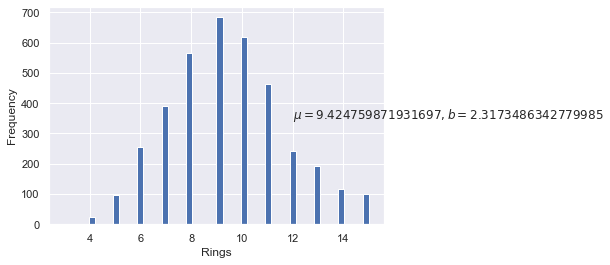

In [3738]:
#visaulize the outliers by using histogram
df['Rings'].plot(kind ='hist', bins=50)
plt.xlabel('Rings')
plt.text(12, 350, r'$\mu=9.424759871931697, b=2.3173486342779985$')

In [3739]:
#transform the value
df['Rings'] = np.log(df['Rings'])

In [3740]:
df['Rings']

0       2.708050
1       1.945910
2       2.197225
3       2.302585
4       1.945910
          ...   
4101    2.397895
4102    2.302585
4103    2.197225
4104    2.302585
4105    2.484907
Name: Rings, Length: 3748, dtype: float64

Text(0.5, 0, 'Rings')

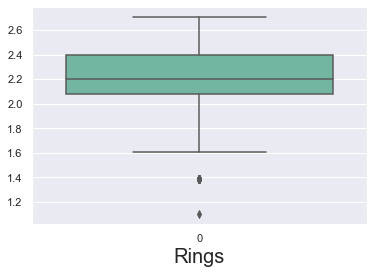

In [3741]:
#visaulize the outliers by using boxplot
ax = sns.boxplot(data=df["Rings"], palette="Set2", dodge=False)

plt.xlabel('Rings', fontsize=20)

In [3742]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Rings'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Rings'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [3743]:
# higher side 
higher_side = df['Rings'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['Rings'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Rings, Length: 3748, dtype: bool
(array([], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
4       False
        ...  
4101    False
4102    False
4103    False
4104    False
4105    False
Name: Rings, Length: 3748, dtype: bool
(array([  50,  226,  251,  413,  417,  732,  734,  737,  886, 1028, 1045,
       1236, 1612, 2238, 2394, 2492, 2493, 2542, 2680, 3041, 3131, 3132,
       3493, 3539, 3692], dtype=int64),)
old Shape:  (3748, 9)


In [3744]:
#removing the outliers
df = df.drop(df.index[high])
df = df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (3723, 9)


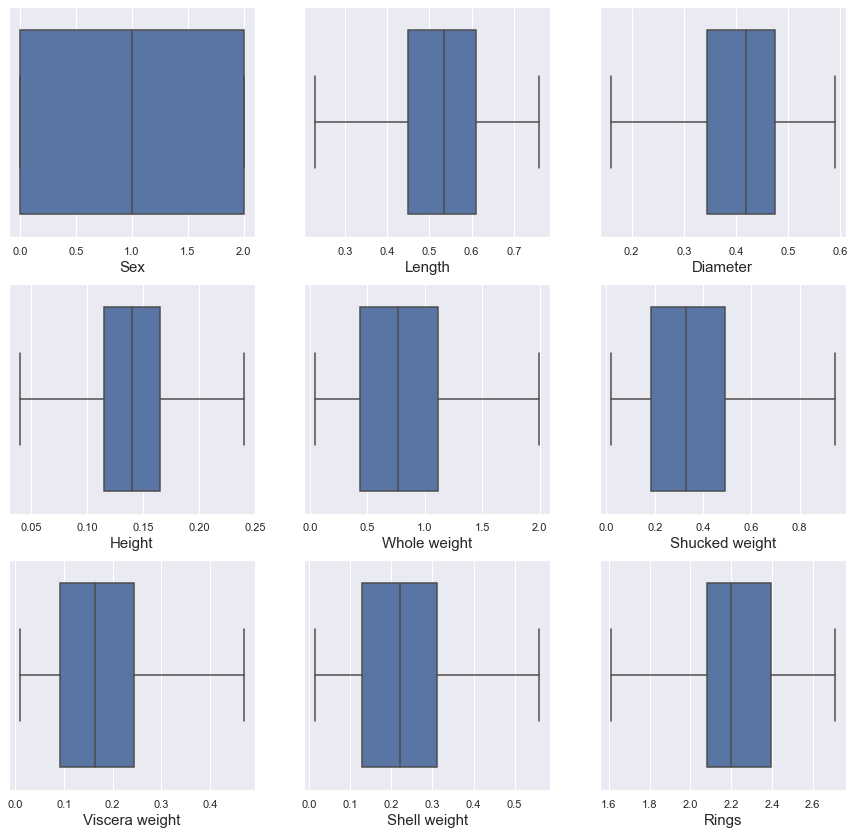

In [3745]:
#visaulize the columns by using boxplot
plt.figure(figsize =(15,50))
graph=1
for column in df:
    if graph<30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show()    

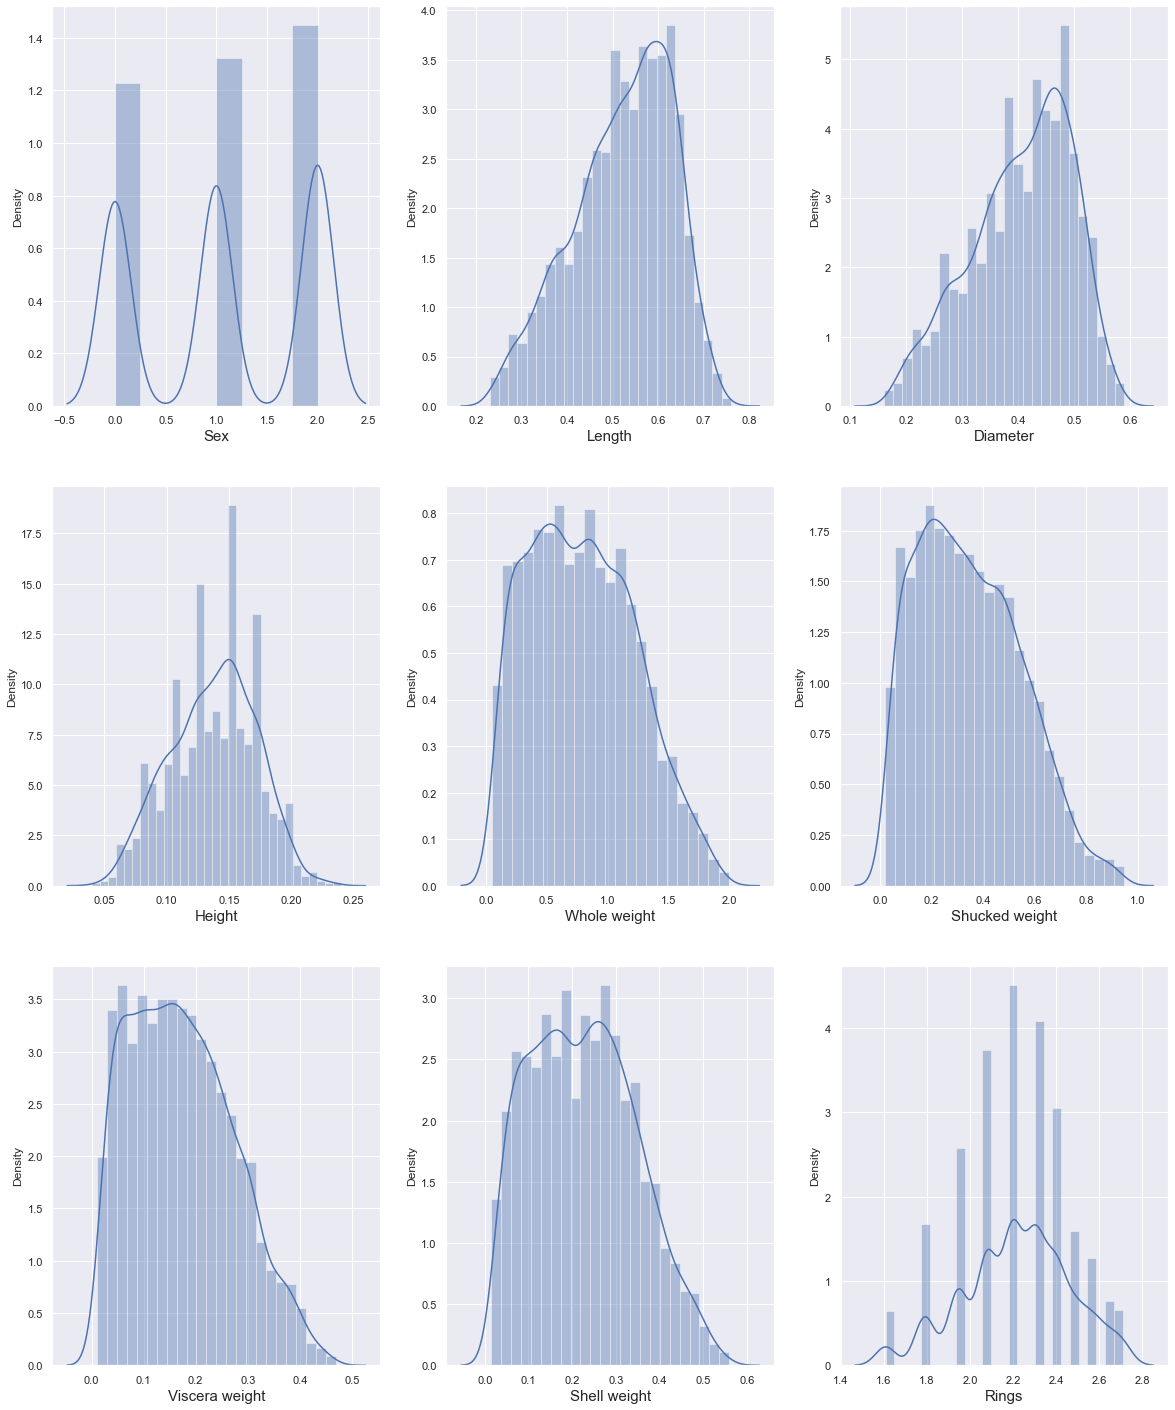

In [3746]:
#visaulize the columns by using distplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()    

In [3747]:
#reset the index and drop the column index
df=df.reset_index()
df.drop(columns = ['index'], inplace = True)

In [3748]:
#clean dataset
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2.708050
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1.945910
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.197225
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.302585
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1.945910
...,...,...,...,...,...,...,...,...,...
3718,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2.397895
3719,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.302585
3720,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.197225
3721,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.302585


In [3749]:
#split x and y
x = df.drop(['Rings'], axis=1)
y=df.Rings

In [3750]:
x.shape

(3723, 8)

In [3751]:
y.shape

(3723,)

In [3753]:
#scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.15844742, -0.62161942, -0.45667029, ..., -0.61618124,
        -0.73470725, -0.6358572 ],
       [ 1.15844742, -1.59166135, -1.57158125, ..., -1.24195054,
        -1.26559291, -1.30630727],
       [-1.2920638 ,  0.07126768,  0.15653074, ..., -0.45598429,
        -0.32516688, -0.13301964],
       ...,
       [ 1.15844742,  0.7179623 ,  0.76973178, ...,  0.89067125,
         1.15120088,  0.6882817 ],
       [-1.2920638 ,  0.94892466,  0.88122287, ...,  0.9182051 ,
         0.88323002,  0.58771418],
       [ 1.15844742,  1.7341967 ,  1.66166055, ...,  2.99325612,
         2.05117848,  2.25545874]])

In [3754]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=42)

In [3755]:
y_train.head()

73      2.564949
1298    2.302585
48      2.079442
932     2.079442
831     2.197225
Name: Rings, dtype: float64

# Linear Regression

In [3803]:
#Model instantiating and training
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [3804]:
#Adjusted r2score
regression.score(x_train, y_train)

0.5156826877265394

In [3805]:
#Let's check how well model fits the test data
regression.score(x_test,y_test)

0.4864970512713538

# Model Evaluation

In [3806]:
#calculate Mean absolute error
y_pred = regression.predict(x_test)
mean_absolute_error(y_test, y_pred)

0.13736650280409443

In [3807]:
#calculate mean squared error
mean_squared_error(y_test,y_pred)

0.03032853408637451

In [3808]:
#calculate root mean square error
np.sqrt(mean_squared_error(y_test,y_pred))

0.17415089458964747

# LASSO Regression

In [3809]:
#import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [3810]:
#to find best alpha
lassocv= LassoCV(alphas=None, max_iter = 1000, normalize = True)

In [3811]:
#train the model
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [3812]:
#best alpha parameter
alpha = lassocv.alpha_
alpha

3.015309136233185e-06

In [3813]:
#fit the data
lasso_reg = Lasso(alpha)

In [3814]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.015309136233185e-06)

In [3815]:
lasso_reg.score(x_test,y_test)

0.48650055856577756

# Ridge Regression

In [3816]:
ridgecv= RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize = True)

In [3817]:
#train the data
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [3818]:
#best alpha parameter
ridgecv.alpha_

0.001

In [3819]:
#fit the data
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [3820]:
ridge_model.score(x_test,y_test)

0.48649704522142523

# AdaBoost Regressor

In [3822]:
ada = AdaBoostRegressor()

In [3836]:
ada_model= ada.fit(x_train,y_train)

In [3837]:
y_pred = ada_model.predict(x_test)

In [3838]:
r2_score(y_test,y_pred)

0.4818115031901101

# XGB Regressor

In [3793]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3795]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(x_train,y_train)
y_pred = xgbr.predict(x_test)
r2_score(y_test, y_pred)

0.46773811821281375

# Gradient Boosting Regressor

In [3830]:
gradientregressor = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)

In [3831]:
gbr = gradientregressor.fit(x_train,y_train)

In [3832]:
y_pred = gbr.predict(x_test)

In [3835]:
r2_score(y_test,y_pred)

0.45863813141854803

# saving the model to the local file system

In [3847]:
with open('Abalone_case_study_model','wb') as f:
    pickle.dump(regression,f)